In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
image_path = "Lena_Image.png"
image = cv2.imread(image_path)

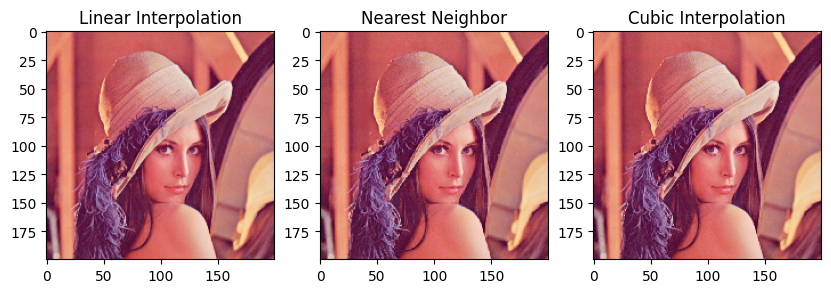

In [ ]:
resize_linear = cv2.resize(image, (200, 200), interpolation=cv2.INTER_LINEAR)
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(resize_linear, cv2.COLOR_BGR2RGB))
plt.title("Linear Interpolation")

resize_nearest = cv2.resize(image, (200, 200), interpolation=cv2.INTER_NEAREST)
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(resize_nearest, cv2.COLOR_BGR2RGB))
plt.title("Nearest Neighbor")

resize_cubic = cv2.resize(image, (200, 200), interpolation=cv2.INTER_CUBIC)
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(resize_cubic, cv2.COLOR_BGR2RGB))
plt.title("Cubic Interpolation")
plt.show()

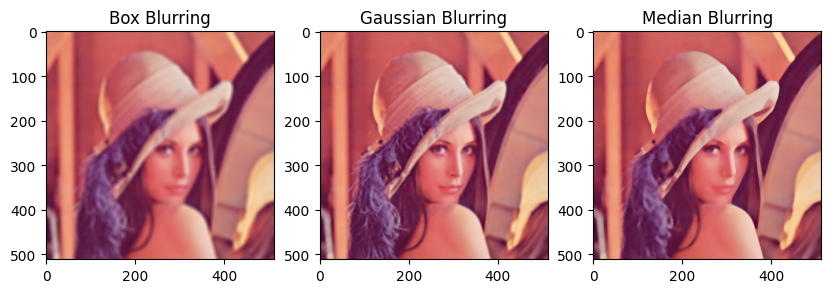

In [ ]:
blur_box = cv2.blur(image, (10, 10))
blur_gaussian = cv2.GaussianBlur(image, (9, 9), 0)
blur_median = cv2.medianBlur(image, 9)

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(blur_box, cv2.COLOR_BGR2RGB))
plt.title("Box Blurring")
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(blur_gaussian, cv2.COLOR_BGR2RGB))
plt.title("Gaussian Blurring")
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(blur_median, cv2.COLOR_BGR2RGB))
plt.title("Median Blurring")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from tensorflow.keras.datasets import mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train.reshape(-1, 28*28), x_test.reshape(-1, 28*28)
x_train, x_test = x_train / 255.0, x_test / 255.0

X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

models = {
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier()
}

kf = KFold(n_splits=5)

# Evaluate models
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro')
    rec = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    cm = confusion_matrix(y_test, y_pred)

    print(f"{name}: Accuracy={acc:.4f}, Precision={prec:.4f}, Recall={rec:.4f}, F1 Score={f1:.4f}")
    print("Confusion Matrix:\n", cm)


Naive Bayes: Accuracy=0.5601, Precision=0.6883, Recall=0.5554, F1 Score=0.5181
Confusion Matrix:
 [[1028    1    9    0    0    2   43    1   68   23]
 [   2 1237    7    8    0    3   12    1   41   11]
 [  73   33  371   86    6    7  290    0  295   13]
 [  58   65   15  466    2    5   55   10  423  120]
 [  26    8   13    6  225    6  104    2  231  555]
 [ 124   31    6   22    5   61   52    3  683  117]
 [   9   18    8    2    1    2 1113    0   23    1]
 [   9   11    3   15   13    2    0  353   44  849]
 [  18  145    6    7    3   10   21    1  721  228]
 [   7    3    4    0    5    1    0    9   19 1146]]
Random Forest: Accuracy=0.9680, Precision=0.9679, Recall=0.9679, F1 Score=0.9678
Confusion Matrix:
 [[1157    0    2    0    2    2    5    1    4    2]
 [   0 1301    7    7    3    0    1    1    1    1]
 [   2    5 1144    6    1    1    2    7    5    1]
 [   3    0   19 1156    1   11    1    9   11    8]
 [   1    0    0    0 1143    0    3    4    1   24]
 [   6